In [1]:
import numpy as np
import matplotlib.pylab as plt
import tensorflow as tf
import datetime

In [2]:
data_root = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    cache_dir='./',
    untar=True)


In [3]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_root),
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)



val_ds = tf.keras.utils.image_dataset_from_directory(
  str(data_root),
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


2022-08-17 19:03:14.394105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 19:03:14.434606: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 19:03:14.434911: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-17 19:03:14.435811: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [4]:
class_names = np.array(train_ds.class_names)
print(class_names)


['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y)) # Where x—images, y—labels.


In [6]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [7]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


2022-08-17 19:03:16.173447: W tensorflow/core/kernels/data/cache_dataset_ops.cc:856] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
model = tf.keras.models.load_model('./resnet50')

In [9]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

2022-08-17 19:03:25.204338: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8500
2022-08-17 19:03:25.821665: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step
['daisy' 'sunflowers' 'sunflowers' 'sunflowers' 'sunflowers' 'roses'
 'roses' 'roses' 'roses' 'dandelion' 'roses' 'roses' 'sunflowers'
 'sunflowers' 'dandelion' 'dandelion' 'daisy' 'roses' 'dandelion'
 'sunflowers' 'dandelion' 'roses' 'sunflowers' 'roses' 'roses' 'roses'
 'dandelion' 'roses' 'roses' 'roses' 'roses' 'sunflowers']


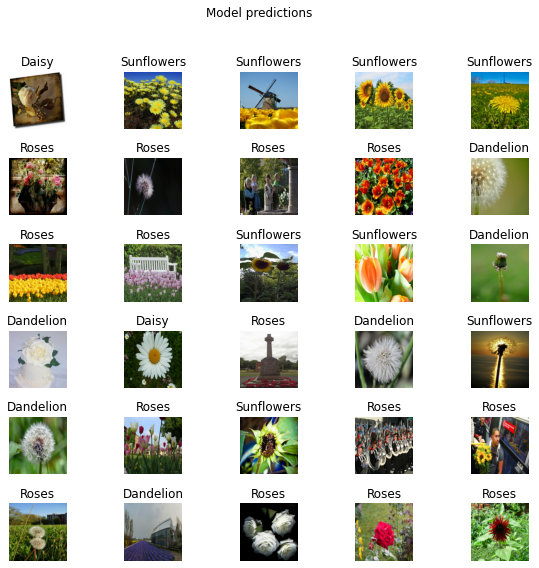

In [10]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")

In [11]:
model = tf.keras.models.load_model('./resnet101')

In [12]:
predicted_batch = model.predict(image_batch)
predicted_id = tf.math.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]
print(predicted_label_batch)

1/1 [==============================] - 2s 2s/step
['daisy' 'dandelion' 'dandelion' 'sunflowers' 'dandelion' 'dandelion'
 'dandelion' 'dandelion' 'tulips' 'dandelion' 'dandelion' 'daisy' 'daisy'
 'daisy' 'dandelion' 'tulips' 'daisy' 'tulips' 'dandelion' 'dandelion'
 'dandelion' 'daisy' 'daisy' 'dandelion' 'dandelion' 'dandelion'
 'dandelion' 'daisy' 'tulips' 'dandelion' 'tulips' 'sunflowers']


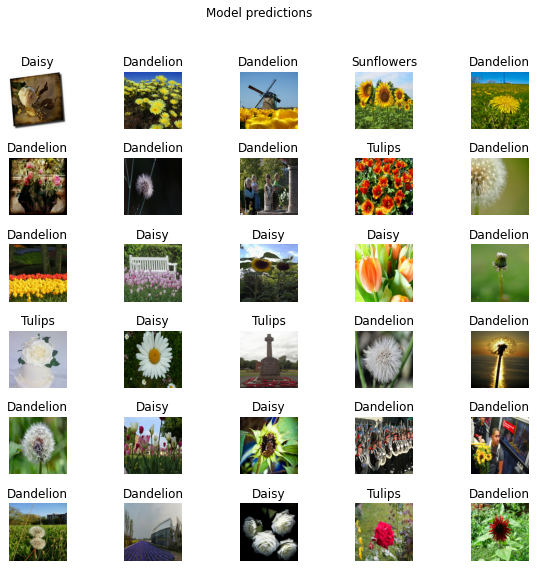

In [13]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)

for n in range(30):
    plt.subplot(6,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(predicted_label_batch[n].title())
    plt.axis('off')
_ = plt.suptitle("Model predictions")